In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Rotating Pendulum solution - integrating equation of motion

![Creating equation of motion for rotating pendulum](../images/09_rotation.png)

## Setup

In this [lecture](https://youtu.be/GnxKLPP6n2c) you solve for the the natural frequency of a pendulum in a rotating reference frame. The result is an equation of motion as such

$\ddot{\theta} = \left(\Omega^2\cos\theta -\frac{g}{l}\right)\sin\theta +\frac{a\Omega^2}{l}\cos\theta$

where $\Omega$ is the rotation rate of the frame holding the pendulum, $a$ is the distance from the point of rotation, $l$ is the pendulum length, and $\theta$ is the generalized coordinate that describes the pendulum's position in the rotating reference frame. 

Consider the cases

|case| natural frequency| function $\theta(t)$ for $\theta<<1$|
|-----------|-----------|-----------|
|$\Omega = 0$| $\omega = \sqrt{\frac{g}{l}}$ | $\theta(t) = \sin\omega t$|
|$\Omega \neq 0$| $\omega = \sqrt{\frac{g}{l}-\Omega^2\cos\theta}$ | $\theta(t) = \sin\omega t+\theta_{offset}$|

These solutions only account for small angles, if $\Omega^2\cos\theta>\frac{g}{l}$, the natural frequency becomes imaginary and the solution is an exponential growth, assuming $\sin\theta=\theta$. The actual solution, shouldn't have an angular speed that keeps growing. 

## Building a numerical solution

Instead of using differential equations to solve for $\theta(t)$, you can use [`scipy.integrate.solve_ivp`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html) to create a numerical solution to the differential equation. 

A __numerical solution__ does not return a mathematical function. Instead, it returns the predicted solution based upon the differential equations. The simplest numerical solution is the [Euler integration](https://en.wikipedia.org/wiki/Euler_method). Consider an exponential decay ODE, 

$\frac{dy}{dt} = -2y$

The exact solution is $y(t) = y_0e^{-2t}$, but you can approximate this solution without doing any calculus. Make the approximation

$\frac{\Delta y}{\Delta t} = -2y$

Now, you have an algebraic equation, 

$\frac{y_{i+1}-y_{i}}{\Delta t} = -2y_i$

where $\Delta t$ is a chosen timestep _the smaller the better_, $y_i$ is the current value of $y$, and $y_{i+1}$ is the approximated next value of $y$. Consider the initial condition $y(0)=2$ and take a time step of $\Delta t =0.1$

$y_{i+1} = y_{i}-2y_{i}\Delta t$

$y(\Delta t) = 2 - 2(0.1) = 1.8$

The exact solution is $y(0.1) = 1.637$, you can make more exact solutions with smaller steps as seen below. 

Text(0, 0.5, 'y')

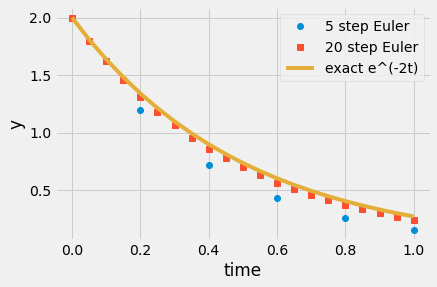

In [15]:
t = np.linspace(0, 1, 6)
dt = t[1] - t[0]
ynum = np.zeros(t.shape)
ynum[0] = 2
for i in range(1,len(t)):
    ynum[i] = ynum[i-1]-2*ynum[i-1]*dt

plt.plot(t, ynum, 'o', label = '5 step Euler')

t = np.linspace(0, 1, 21)
dt = t[1] - t[0]
ynum = np.zeros(t.shape)
ynum[0] = 2
for i in range(1,len(t)):
    ynum[i] = ynum[i-1]-2*ynum[i-1]*dt

plt.plot(t, ynum, 's', label = '20 step Euler')

plt.plot(t, 2*np.exp(-2*t), label = 'exact e^(-2t)')
plt.legend()
plt.xlabel('time')
plt.ylabel('y')

## Define ODE for rotating pendulum

Numerical integration requires first-order differential equations, but here you have a second-order differential equation. You can rewrite your single second-order equation of motion as two first-order equations of motion as such

$\bar{y} = [\theta,~\dot{\theta}]$

$\dot{\bar{y}} = [\dot{\theta},~\ddot{\theta}]$

$\ddot{\theta} = f(t,\theta, \dot{\theta})\rightarrow \dot{\bar{y}} = f(t,~\bar{y})$

take a look at the function defining the derived equation of motion, `pend_rot(t, y)`

- first output is taken from the input, `dy[0] = y[1]`: $\frac{d}{dt}\theta = \dot{\theta}$
- the second output is taken from the equation of motion directly, `dy[1]=` $\ddot{\theta} = \left(\Omega^2\cos\theta -\frac{g}{l}\right)\sin\theta +\frac{a\Omega^2}{l}\cos\theta$

In [16]:
def pend_rot(t, y, w, l = 0.3, a = 1):
    '''
    function that defines 2 first-order ODEs for a rotating pendulum
    arguments:
    ----------
    t: current time
    y: current angle and angular velocity of pendulum [theta (rad), dtheta(rad/s)]
    w: rotation rate of frame in (rad/s)
    l: length of pendulum arm
    a: distance from point of rotation
    
    outputs:
    --------
    dy: derivative of y at time t [dtheta (rad/s), ddtheta(rad/s/s)] 
    '''
    dy=np.zeros(y.shape)
    dy[0]=y[1]
    dy[1]=(w**2*np.cos(y[0])-9.81/l)*np.sin(y[0])+a*w**2/l*np.cos(y[0])
    return dy

## Solving the equation of motion

Now that you have defined `pend_rot`, you can import `solve_ivp` and solve for $\theta$ as a function of time. 

- Import `scipy.integrate.solve_ivp`

In [17]:
from scipy.integrate import solve_ivp

- plug in values for the constants and solve for one full cycle at
  $\Omega=1~rad/s$
  i.e. $1~cycle\frac{2\pi~rad}{cycle}\frac{1~rad}{s}$

In [37]:

l=0.3
a=1
w=1
g=9.81
T = 2*np.pi
my_ode = lambda t,y: pend_rot(t,y,w = w, l = l, a = a)

sol = solve_ivp(my_ode,[0,T] , [np.pi/6,0], 
                t_eval = np.linspace(0,T,600));

Your results are now saved in the variable `sol`:
- `sol.t`: array of points in time where the integration returned a
  solution
- `sol.y`: array of two values (`sol.y[0]` = $\theta(t)$ and `sol.y[1]`
  = $\dot{\theta}(t))$

Plot the result to compare to a hanging pendulum. You used an initial
resting state with $\theta(0) = \frac{\pi}{12}$. The non-rotating
solution is 

$\theta(t) = \frac{\pi}{6}\cos\sqrt{\frac{g}{l}} t$


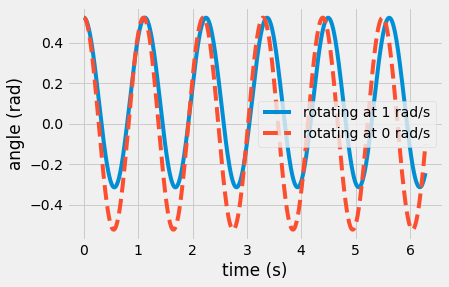

In [38]:
plt.plot(sol.t,sol.y[0,:], label = 'rotating at {} rad/s'.format(w))
plt.plot(sol.t, np.pi/6*np.cos(np.sqrt(g/l)*sol.t),'--', label = 'rotating at 0 rad/s')

plt.legend()
plt.xlabel('time (s)')
plt.ylabel('angle (rad)');

## Visualize the motion _with animations_

This is great, but what does the motion look like? Now, use the
kinematic definitions to define 3D coordinates of the frame and pendulum
arm. 

- $r_{P/O} = (a+y_2)\cos(\Omega t) \hat{i} +(a+y_2)\sin\Omega t \hat{j}
+(a-x_2)\hat{k} = x_1\hat{i} +y_1\hat{j}+z_1 \hat{k}$
- $x_2= l\sin\theta$
- $y_2= l\cos\theta$
- link arm goes from $(0,~0,~0) \rightarrow (0,~0,~a) \rightarrow
  (a\cos\Omega t, a\sin\Omega t, a)$

In [39]:
t = sol.t
y = sol.y
x1=np.cos(w*t)*(a+l*np.sin(y[0,:])) # x1-coordinate over time
y1=np.sin(w*t)*(a+l*np.sin(y[0,:])) # y1-coordinate over time
z1=a-l*np.cos(y[0,:]);          # z1-coordinate over time
linkx=np.block([np.zeros((len(t),1)), 
               np.zeros((len(t),1)), 
               a*np.cos(w*t[:,np.newaxis])])
linky=np.block([np.zeros((len(t),1)), 
                np.zeros((len(t),1)), 
                a*np.sin(w*t[:,np.newaxis])])
linkz=np.block([np.zeros((len(t),1)), 
                a*np.ones((len(t),1)), 
                a*np.ones((len(t),1))])

The kinematics are now defined for the pendulum and frame in the fixed,
3D coordinate system. You can import `animation` and plot the frame and
pendulum. 

In [40]:
from matplotlib import animation
from IPython.display import HTML

Here, you set up the 3D axes for plotting and the line updating
functions, `init` and `animate`.

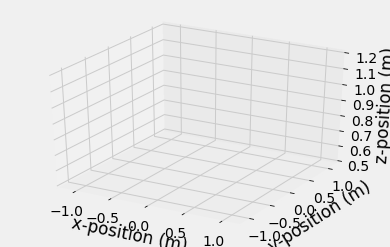

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
line1, = ax.plot([], [], [])
line2, = ax.plot([], [], [], 'o-')
line3, = ax.plot([], [], [], '--')
ax.set_xlim(-1.2,1.2)
ax.set_ylim(-1.2,1.2)
ax.set_zlim(0.5,1.2)

#ax.view_init(elev=10., azim=10)
ax.set_xlabel('x-position (m)')
ax.set_ylabel('y-position (m)')
ax.set_zlabel('z-position (m)')

def init():
    line1.set_data([], [])
    line1.set_3d_properties([])
    line2.set_data([], [])
    line2.set_3d_properties([])
    line3.set_data([], [])
    line3.set_3d_properties([])
    return (line1, line2, line3)

def animate(i):
    line1.set_data(linkx[i,:], linky[i,:])
    line1.set_3d_properties(linkz[i,:])
    line2.set_data([linkx[i,2], x1[i]], [linky[i,2], y1[i]])
    line2.set_3d_properties([linkz[i,2], z1[i]])
    line3.set_data(x1[:i], y1[:i])
    line3.set_3d_properties(z1[:i])
    return (line1, line2, line3, )

Now, animate the motion of the pendulum and its path. 

In [42]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=range(0,len(t)), interval=10, 
                               blit=True)

In [ ]:
HTML(anim.to_html5_video())

## Wrapping up

In this notebook, you created a general solution for nonlinear
differential equations. You did this by:

- creating 2 first-order differential equations from one second-order
  differential equation
- defining a function that returns the derivative based upon the current
  state $(\theta,~\dot{\theta})$
- using `solve_ivp` to integrate the differential equations

Once you had a solution, you processed the results by:

- plotting the generalized coordinate vs time
- comparing the solution to a known result
- plugging the generalized coordinate into the defining kinematics
- creating a 3D animation of your solution

__Nice work!__